## Q1. Median Maintenance using a Heap


### Part 1

Implement a "dominant heap" class `BinaryHeap`, which can handle both the min heap and the max heap cases, by having the constructor explicitly pass the "comparison" operator in. Replace min and del_min by dominant and del_dominant methods. Change the classmethod to also take in the operator.

In [14]:
#your code here
from IPython.display import Image
class BinaryHeap:
    """
    Binary heap class that acts as either a min heap or a max heap. 
    
    Examples
    --------
    >>> from operator import gt, lt
    >>> data = [1,8,5,9,23,2,45,6,7,99,-5]
    >>> bh = BinaryHeap.heapify_slow(data, lt)
  
    """ 
    def __init__(self, comparison_operator): # Add comparison operator
        """
        Initialize the binary heap class.
    
        Parameters
        ----------
        comparison_operator : builtin_function_or_method
            less than (lt) or greater than (gt) function

        Examples
        --------
        >>> from operator import gt, lt
        >>> bh = BinaryHeap(lt)
        """ 
        self.storage=[None]
        self.upto=0
        self.min_max = comparison_operator # Store as a property
        
    @classmethod
    def heapify_slow(cls, it, comparison_operator): 
        inst = cls(comparison_operator) # Instantiate with comparison operator
        for i in it:
            inst.insert(i)
        return inst
            
    def insert(self, value):
        self.storage.append(value)
        self.upto += 1
        self.sift_up(self.upto)

    def sift_up(self, i):
        parent = i // 2
        # If "less than" operator, switch parent and child if child is less than parent
        # If "greater than" operator, switch if child is greater than parent.
        if parent > 0 and self.min_max(self.storage[i],self.storage[parent]): 
            self.storage[i], self.storage[parent] = self.storage[parent], self.storage[i]
            self.sift_up(parent)
     
    def _min_max_child(self, i):            
        if 2*i + 1 > self.upto: # If the second child index is out of range
            return 2*i # Return the first child index
        else: 
            l = (self.storage[2*i], self.storage[2*i+1]) # Indices of both children
            return 2*i + self.min_max(l[1], l[0]) # Return index of min/max child, depending on comparison operator
    
    def sift_down(self, i):
        if 2*i <= self.upto: # If the first child index exists
            child = self._min_max_child(i) # Get the index of the min/max child depending on the operator specified
            if self.min_max(self.storage[child], self.storage[i]): # If the parent is greater/less than than the child
                self.storage[child], self.storage[i] = self.storage[i], self.storage[child] # Swap them
                self.sift_down(child)
        
    def dominant(self):
        return self.storage[1] # Get the head of the tree
    
    def del_dominant(self):
        dominant = self.storage[1] 
        # Switch the dominant and last
        self.storage[1], self.storage[self.upto] = self.storage[self.upto], self.storage[1] 
        self.storage.pop() # Remove the dominant
        self.upto -= 1 # Lower the length counter by 1
        self.sift_down(1) 
        return dominant

In [15]:
data = [1,8,5,9,23,2,45,6,7,99,-5]

In [27]:
from operator import gt, lt
# Min-heap case
bh = BinaryHeap.heapify_slow(data, lt)
print(bh.storage)
bh.dominant()

[None, -5, 1, 2, 7, 6, 5, 45, 9, 8, 99, 23]


-5

In [17]:
# Test deleting the min
bh.del_dominant()
print (bh.storage)
bh.dominant()

[None, 1, 6, 2, 7, 23, 5, 45, 9, 8, 99]


1

In [18]:
# Max-heap case
bh = BinaryHeap.heapify_slow(data, gt)
print(bh.storage)
bh.dominant()

[None, 99, 45, 23, 7, 9, 2, 5, 1, 6, 8, -5]


99

In [19]:
# Test deleting the max
bh.del_dominant()
print (bh.storage)
bh.dominant()

[None, 45, 9, 23, 7, 8, 2, 5, 1, 6, -5]


45

### Part 2

Median maintenance is a very cool algorithm to find an online median.
We create two arrays to test our implementation, using np.median to test our answer...

In [20]:
import random
import numpy as np
l = [random.randint(1,1000) for _ in range(150)]
print(len(l), np.median(l))
l2 = l + [random.randint(1,1000)]
print(len(l2), np.median(l2))

150 542.5
151 540.0


You will implement def online_median(iterator) which is a generator yielding successive values of your online median.

The algorithm is as follows:

We'll use 2 heaps, a max heap for the lower half of the data, and a min-heap for the upper half. We take the first 2values in our data and assign the smaller value to the max heap, while the larger value goes to the min-heap. Then, as we "insert" subsequent values in one of the two heaps, the following holds: if we keep the number of elements in both heaps equal (for the even case) or at-most differing by one, the median is respectively the average of the two dominants or the dominant in the heap with one extra item.

What then is our strategy for this balanced insertion? Quite simple really: if a new value is not as dominant as the dominant value, add it to that heap. If it is more dominant, add it to the other. If two items in a row get added to the same heap, the heaps will be out of balance by more than one. In this case, take the dominant element from the larger heap and simply add it to the smaller one.

In [21]:
#your code here
def online_median(iterator):
    """
    Calculate the online median.
    
    Parameters
    ----------
    iterator : generator
        a generator of items to add to online median calculation
        
    Returns
    -------
    generator of median values yielded after each item is added.

    Notes
    -----
    POST: 
        - 'iterator' is not changed by this function
          
    Examples
    --------
    >>> input = iter(range(10))
    >>> online_median(input)
    <generator object online_median at 0x109386938>
    >>> list(online_median(input))
    [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
    
    """ 
    n=0
    
    # Create two empty binary heaps.
    lower_half = BinaryHeap(gt)
    upper_half = BinaryHeap(lt)
    first_one = 0
    for value in iterator:
        if n == 0: 
            # Store first value
            first_one = value
            n+=1
            median= first_one
            yield median
            continue
        elif n==1:
            # For first two values, Add min to lower half, max to upper half
            lower_half.insert(min(value, first_one))
            upper_half.insert(max(value, first_one))
        elif n>1:
            # Compare with dominant of each heap.
            if value < lower_half.dominant():
                lower_half.insert(value)
            else:
                upper_half.insert(value)
        # Check to make sure the length of the heaps does not differ by more than one. 
        if abs(lower_half.upto - upper_half.upto)>1:
            # if it does, take the dominant element from larger heap and add it to smaller one
            if lower_half.upto > upper_half.upto:
                upper_half.insert(lower_half.dominant())
                lower_half.del_dominant()
            else:
                lower_half.insert(upper_half.dominant())
                upper_half.del_dominant()
        if lower_half.upto == upper_half.upto:
            median =  (lower_half.dominant() + upper_half.dominant())/2
        elif lower_half.upto < upper_half.upto: 
            median = upper_half.dominant()
        else:
            median = lower_half.dominant()
        yield float(median)
        # Add to the counter
        n += 1 

In [24]:
# Checking doc test
input = iter(range(10))
list(online_median(input))

[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

Do your answers match?


508.0


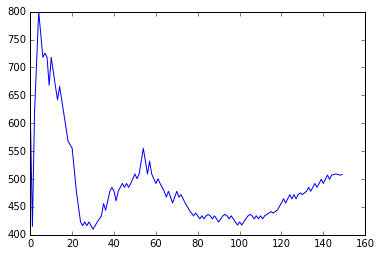

In [344]:
%matplotlib inline
import matplotlib.pyplot as plt
medians = list(online_median(iter(l)))
print(medians[-1])
plt.plot(medians)

In [346]:
list(online_median(iter(l2)))[-1]

509.0

Lastly, lets repeat the analysis we did last time on the randomly generated data.

In [347]:
from random import normalvariate, random
from itertools import count
def make_data(m, stop=None):
    for _ in count():
        if stop and _ > stop:
            break
        yield 1.0e09 + normalvariate(0, m*random() )

In [348]:
g = online_median(make_data(5, 100))
print(type(g))
out = list(g)
out[-10:]

<class 'generator'>


[1000000000.0103987,
 1000000000.0131545,
 1000000000.0103987,
 1000000000.007643,
 1000000000.0103987,
 1000000000.0131545,
 1000000000.0366889,
 1000000000.0131545,
 1000000000.0103987,
 1000000000.0131545]

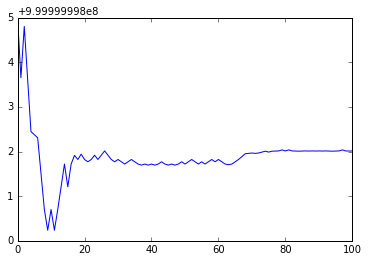

In [349]:
plt.plot(out)

## Q2

### Simulating a flight check-in counter

It is your job to simulate a flight-checkin counter. There are m agents handling n passengers. The passengers arrive in line with in-between time given by an exponential distribution for INTER_ARRIVAL_TIME. Each passenger, once he or she gets to a counter, is processed in a time drawn from an exponential distribution with PROCESSING_TIME. 

Clearly, in the usual case of 3-4 agents and 200+ customers on a flight, the customer waits much longer. We have been hired by the airlines customer-relations group to see how many extra agents must we hire to reduce waiting times by how much.

We start by representing each customer by a co-routine, which starts with the `inline` event. The state changes to the `atcounter` event, and then `ptime` seconds later, to the `leaves` event. Notice how this customer "process" is stopped at the yield, until the customer can be handled.

In [1]:
import collections, random
Event = collections.namedtuple('Event', 'time cid action agent')
def customer_process(idee, start, ptime):
    t, agent = yield Event(start, idee, "inline", None)
    t, agent = yield Event(t, idee, "atcounter", agent)
    yield Event(t+ptime, idee, "leaves", agent)            

The following function simply implements the draw from the exponential distribution for a given customer:

In [2]:
def duration(arr_time, service_time):
    return random.expovariate(1./arr_time), random.expovariate(1./service_time)

Here is our main simulation class. you will be filling in parts of this class.

The constructor sets up the simulation. Three queues are created, one for agents that become free, one priority queue for events so that they can be processed in the order recieved, and a backlog for queue for those customers waiting in line because no agent was available.

We set up all the customers in the constructor, with two dictionaries, one to hold the co-routines, and one to hold time metadata which we shall use to figure the average waiting time.

The `run` method is where all the action happens and is the one you will edit.

In [3]:
import queue
import logging
class Simulator:
    
    def __init__(self, n_agents, n_customers, INTER_ARRIVAL_TIME =1., PROCESSING_TIME=3., DEBUG=False ): 
        #queues
        self.free_agents = queue.Queue()
        self.backlog = queue.Queue()
        self.events=queue.PriorityQueue()
        #save the arguments
        self.n_customers = n_customers
        self.n_agents = n_agents
        self.intertime=INTER_ARRIVAL_TIME
        self.proctime=PROCESSING_TIME
        #dictionaries to hold customer process
        self.customers={}
        self.customer_meta={}
        self.logger = logging.getLogger("sim")
        if DEBUG:
            self.logger.setLevel(logging.DEBUG)
            self.logger.addHandler(logging.StreamHandler()) # Allow logger to print logs in debug mode
        else:
            self.logger.setLevel(logging.WARNING)
        #on the free_agents queue, we put all the agents, and the time
        #they got free
        for i in range(n_agents):
            self.free_agents.put((i,0))
        #this tracks when each customer came in.          
        time_when_came=0.
        for j in range(n_customers): # For each of the customers
            # Generate the time between customers and process time from a random exponential distribution.
            interarrtime, proctime = duration(self.intertime, self.proctime) 
            time_when_came += interarrtime # Add the interval time to get the time when the person came.
            intuple = (j, time_when_came, proctime)
            c = customer_process(*intuple) # Initiate a customer process with ID, start time, and process time
            self.logger.debug("Customer {}, arrived {}, will take {} at counter".format(*intuple))
            #add each customer to dictionaries
            self.customers[j]=c
            self.customer_meta[j]={'cid':j, 'start':time_when_came, 'finish':None}
        self.logger.debug("========ending init==============\n\n")
        self.max_time_when_came=time_when_came  

    def run(self, end_time):
        #we prime each customer co-routine at the start
        #and put that event in the events priority queue
        #Since an event is a tuple, the ordering will be by start time
        for cid, proc in sorted(self.customers.items()):
            #print(cid, self.customer_meta[cid])
            first_event = next(proc)#prime
            self.events.put(first_event)#customer in line
        

        #start at time 0
        sim_time = 0
        while sim_time < end_time:
            #we are done if no events and no backlog
            if self.events.empty() and self.backlog.empty(): 
                self.logger.debug('*** end of events and backlog***') 
                break
            #if we have agents available and a backlog
            #take customer from backlog queue. This is equivalent
            #to taking customers from line
            if not self.backlog.empty() and not self.free_agents.empty(): # If we can take from the backlog
                "YOUR CODE HERE"
                current_event = self.backlog.get(0) # We take and remove the first element of the backlog.
                #print(current_event)
                
                #the sim time from this branch will be false
                #as we get the old time the person in the line showed up
            else: 
                
                #get current event in all other cases
                # This ensures that leave events are processed thus
                # freeing up agents
                "YOUR CODE HERE"
                current_event = self.events.get(0) # If we can't take from backlog (because it's empty or no agents)
                
                
            sim_time, cid, action, agent = current_event # Extract from the current event
            #print(current_event)
            #print(self.customer_meta)
            #get the current customer process
            cproc = self.customers[cid]
                
            if action=='leaves':
                self.logger.debug(">>>Customer {} leaves, agent {} free at {}".format(cid, agent, sim_time))
                #an agent gets free. Put the time they got free on q
                #also update the metadata
                self.free_agents.put((agent, sim_time))
                self.customer_meta[cid]['finish']=sim_time
            elif action=='atcounter':
                self.logger.debug("Customer {} atcounter Agent {} at {}".format(cid, agent, sim_time))
                next_time = sim_time #processing time already in coroutine
            elif action=='inline': #the agent is None to start
                self.logger.debug('----------------------------------------------')
                self.logger.debug("Customer {}, arrived in line @ {}.".format(cid, sim_time))

                if self.free_agents.empty():
                    self.logger.debug("NO agents available, putting {} inline on backlog at {}".format(cid, sim_time))
                    "YOUR CODE HERE"
                    self.backlog.put(current_event) # Put current event into backlog
                    continue # No need to execute the rest of the loop because we can't proceed with this customer
                else:
                    self.logger.debug("{} agents available to serve.".format(self.free_agents.qsize()))
                    #handle both situations
                    #of getting from backlog or regular. The time in
                    #next_time which you will send in message to co-routine
                    #below are different
                    "YOUR CODE HERE"
                    agent = self.free_agents.get() # Get any free agent
                    if agent[-1] > sim_time: # If the agent was available after the customer arrived
                        # The time of service will be when the agent was available since the customer was waiting
                        next_time = agent[-1] 
                    elif agent[-1] <=sim_time:
                        # If there were agents available when the customer arrived, the time of service is right away
                        next_time = sim_time
                    self.logger.debug("Customer {} inline to be served by Agent {} at {}".format(cid, agent, next_time))
            #drive the co-routine by sending in time and agent, and getting
            #next event out. The event is put into the priority queue.
            try:
                next_event = cproc.send((next_time, agent)) 
            except StopIteration:
                del self.customers[cid] 
            else:
                self.events.put(next_event)
              
    def compute_ptimes(self):
        ptimes=[]
        for j in range(self.n_customers):
            if self.customer_meta[j]['finish']!=None:
                ptimes.append(self.customer_meta[j]['finish'] - self.customer_meta[j]['start'])
        return ptimes
def sim_main(num_agents, num_customers, extratime=20., seed=None, debug=False):
    if seed is not None:
        random.seed(seed)
    sim = Simulator(num_agents, num_customers, DEBUG=debug)
    sim.run(sim.max_time_when_came+extratime)
    return sim
#sim=sim_main(2,6, debug=True)
#print("completed")

In [34]:
#Look at state of properties

#print(sim.free_agents.queue)
#print(sim.customer_meta)
#print(sim.events.queue)
#print(sim.customers)
#print(sim.customer_meta)

In [5]:
def sim_main(num_agents, num_customers, extratime=20., seed=None, debug=False):
    if seed is not None:
        random.seed(seed)
    sim = Simulator(num_agents, num_customers, DEBUG=debug)
    sim.run(sim.max_time_when_came+extratime)
    return sim

Start small to test this out.

In [6]:
sim=sim_main(2,6, debug=True)

Customer 0, arrived 0.9787877431058045, will take 3.8925707759031933 at counter
Customer 1, arrived 1.1166681935367806, will take 0.5649717554281514 at counter
Customer 2, arrived 3.272780881044933, will take 3.5616136364253466 at counter
Customer 3, arrived 3.333218325828357, will take 3.234868201914824 at counter
Customer 4, arrived 3.690416593512793, will take 7.335923832428126 at counter
Customer 5, arrived 3.7379771971213183, will take 0.014032881541030901 at counter
========ending init==============


----------------------------------------------
Customer 0, arrived in line @ 0.9787877431058045.
2 agents available to serve.
Customer 0 inline to be served by Agent (0, 0) at 0.9787877431058045
Customer 0 atcounter Agent (0, 0) at 0.9787877431058045
----------------------------------------------
Customer 1, arrived in line @ 1.1166681935367806.
1 agents available to serve.
Customer 1 inline to be served by Agent (1, 0) at 1.1166681935367806
Customer 1 atcounter Agent (1, 0) at 1.11

In [7]:
sim.customer_meta

{0: {'cid': 0, 'finish': 4.871358519008998, 'start': 0.9787877431058045},
 1: {'cid': 1, 'finish': 1.681639948964932, 'start': 1.1166681935367806},
 2: {'cid': 2, 'finish': 6.83439451747028, 'start': 3.272780881044933},
 3: {'cid': 3, 'finish': 8.106226720923821, 'start': 3.333218325828357},
 4: {'cid': 4, 'finish': 14.170318349898405, 'start': 3.690416593512793},
 5: {'cid': 5, 'finish': 8.120259602464852, 'start': 3.7379771971213183}}

Now lets try it with some larger numbers.

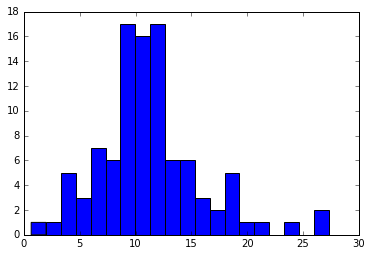

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
sim=sim_main(3,100)
plt.hist(sim.compute_ptimes(), bins=20);

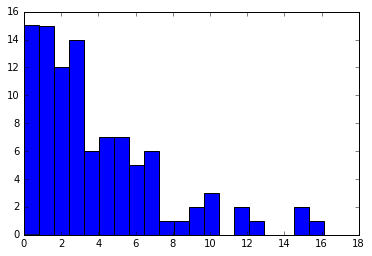

In [9]:
sim2=sim_main(4,100)
plt.hist(sim2.compute_ptimes(), bins=20);

extra time needed below as with 400 passengers a long time is taken to process.

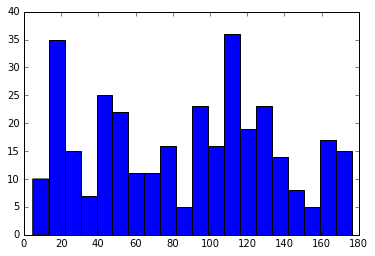

In [10]:
sim2=sim_main(2,400, extratime=100)
plt.hist(sim2.compute_ptimes(), bins=20);

For a proper statistical analysis, you would want to draw this multiple times and look at the distribution of the averages as well. But you should know what this distribution is :-).